<a href="https://colab.research.google.com/github/Elwing-Chou/ximen0926/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# tensorflow + keras -> tensorflow 2
from tensorflow.keras.datasets.cifar10 import load_data
# ((訓練圖片, 訓練答案), (驗證圖片, 驗證答案))
(x_train, y_train), (x_test, y_test) = load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [2]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [5]:
# 她為了以後的擴展: 所以是(50000, 1)
# [[1, 2], [0, 1]....]
y_train = y_train.reshape(50000)
y_test = y_test.reshape(10000)

In [6]:
trans = [
    "airplane",										
    "automobile",										
    "bird",										
    "cat",										
    "deer",										
    "dog",										
    "frog",										
    "horse",										
    "ship",										
    "truck",
]

bird


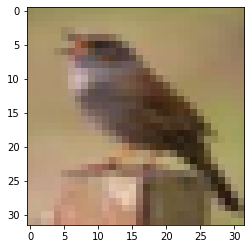

In [10]:
# 只要matplotlib cmap參數: https://matplotlib.org/stable/tutorials/colors/colormaps.html
# 反過來: _r inferno -> inferno_r
import pandas as pd
# 0-59999
idx = 560
import matplotlib.pyplot as plt
print(trans[y_train[idx]])
plt.imshow(x_train[idx])

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D

layers = [
    # 64(種Conv) * [9 * 3](1個filter係數) + 64(bias) = 1792
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 128(種) * [9 * 64](1個filter) + 128(bias) = 73856
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(512, 3, padding="same", activation="relu"),
    MaxPooling2D(),    
    # GAP!!!!!!
    GlobalAveragePooling2D(),
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 4, 4, 256)       

In [14]:
# mse: 可以, 但訓練起來(loss min)很花時間, 
# 回歸時候使用可以, 分類太花時間
# 分類: loss -> Cross Entropy
# 如果最後只有一個神經元輸出(sigmoid激活): BinaryCrossEntropy
# p log1/q + (1-p) log(1/1-q)
# 如果最後是多個神經元輸出(softmax激活): CategoricalCrossEntropy
# p1 log1/q1 + p2 log1/q2
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss=CategoricalCrossentropy(),
       optimizer="adam",
       metrics=["accuracy"])

In [15]:
# One-Hot
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
print(y_train[0])
print(y_train_cat[0])

6
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [16]:
# 攤平(28x28->784) -> Scaling(/255.0)
# tensorflow要求: 輸入 1. 0-1  2. -1-1
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [17]:
# batch: 爽就好, 圖片小: 100筆一次 圖片大:20比一次
# 60000筆: 54000筆(訓練) / 100 = 540次細數調整
# epochs: 54000筆 要看 幾遍 -> 什麼時候要停(不要過擬和, val_loss平滑就停)
# epochs=10, 540次 * 10(epoch) -> 5400次
# verbose: log印多少 預設1:進度條  0:無聲  2:除了進度條都有
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
cs = [
    # 存檔
    ModelCheckpoint("cnn.h5", save_best_only=True),
    # 提早停止
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_norm,
     y_train_cat,
     batch_size=100,
     epochs=100,
     validation_split=0.1,
     callbacks=cs,
     verbose=2)

Epoch 1/100
450/450 - 15s - loss: 1.6001 - accuracy: 0.4101 - val_loss: 1.2653 - val_accuracy: 0.5404 - 15s/epoch - 33ms/step
Epoch 2/100
450/450 - 5s - loss: 1.1133 - accuracy: 0.6015 - val_loss: 0.9618 - val_accuracy: 0.6600 - 5s/epoch - 12ms/step
Epoch 3/100
450/450 - 5s - loss: 0.8983 - accuracy: 0.6841 - val_loss: 0.8405 - val_accuracy: 0.7056 - 5s/epoch - 12ms/step
Epoch 4/100
450/450 - 5s - loss: 0.7496 - accuracy: 0.7368 - val_loss: 0.7669 - val_accuracy: 0.7338 - 5s/epoch - 11ms/step
Epoch 5/100
450/450 - 5s - loss: 0.6519 - accuracy: 0.7727 - val_loss: 0.6812 - val_accuracy: 0.7626 - 5s/epoch - 11ms/step
Epoch 6/100
450/450 - 5s - loss: 0.5633 - accuracy: 0.8033 - val_loss: 0.7218 - val_accuracy: 0.7536 - 5s/epoch - 11ms/step
Epoch 7/100
450/450 - 5s - loss: 0.4798 - accuracy: 0.8339 - val_loss: 0.6462 - val_accuracy: 0.7790 - 5s/epoch - 11ms/step
Epoch 8/100
450/450 - 5s - loss: 0.3958 - accuracy: 0.8630 - val_loss: 0.6903 - val_accuracy: 0.7784 - 5s/epoch - 11ms/step
Epoch 

In [18]:
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 2s 4ms/step - loss: 0.6848 - accuracy: 0.7711


[0.6848040819168091, 0.7710999846458435]

In [19]:
pre = model.predict(x_test_norm).argmax(axis=-1)
pre

313/313 [==============================] - 1s 4ms/step


array([3, 8, 8, ..., 5, 1, 7])

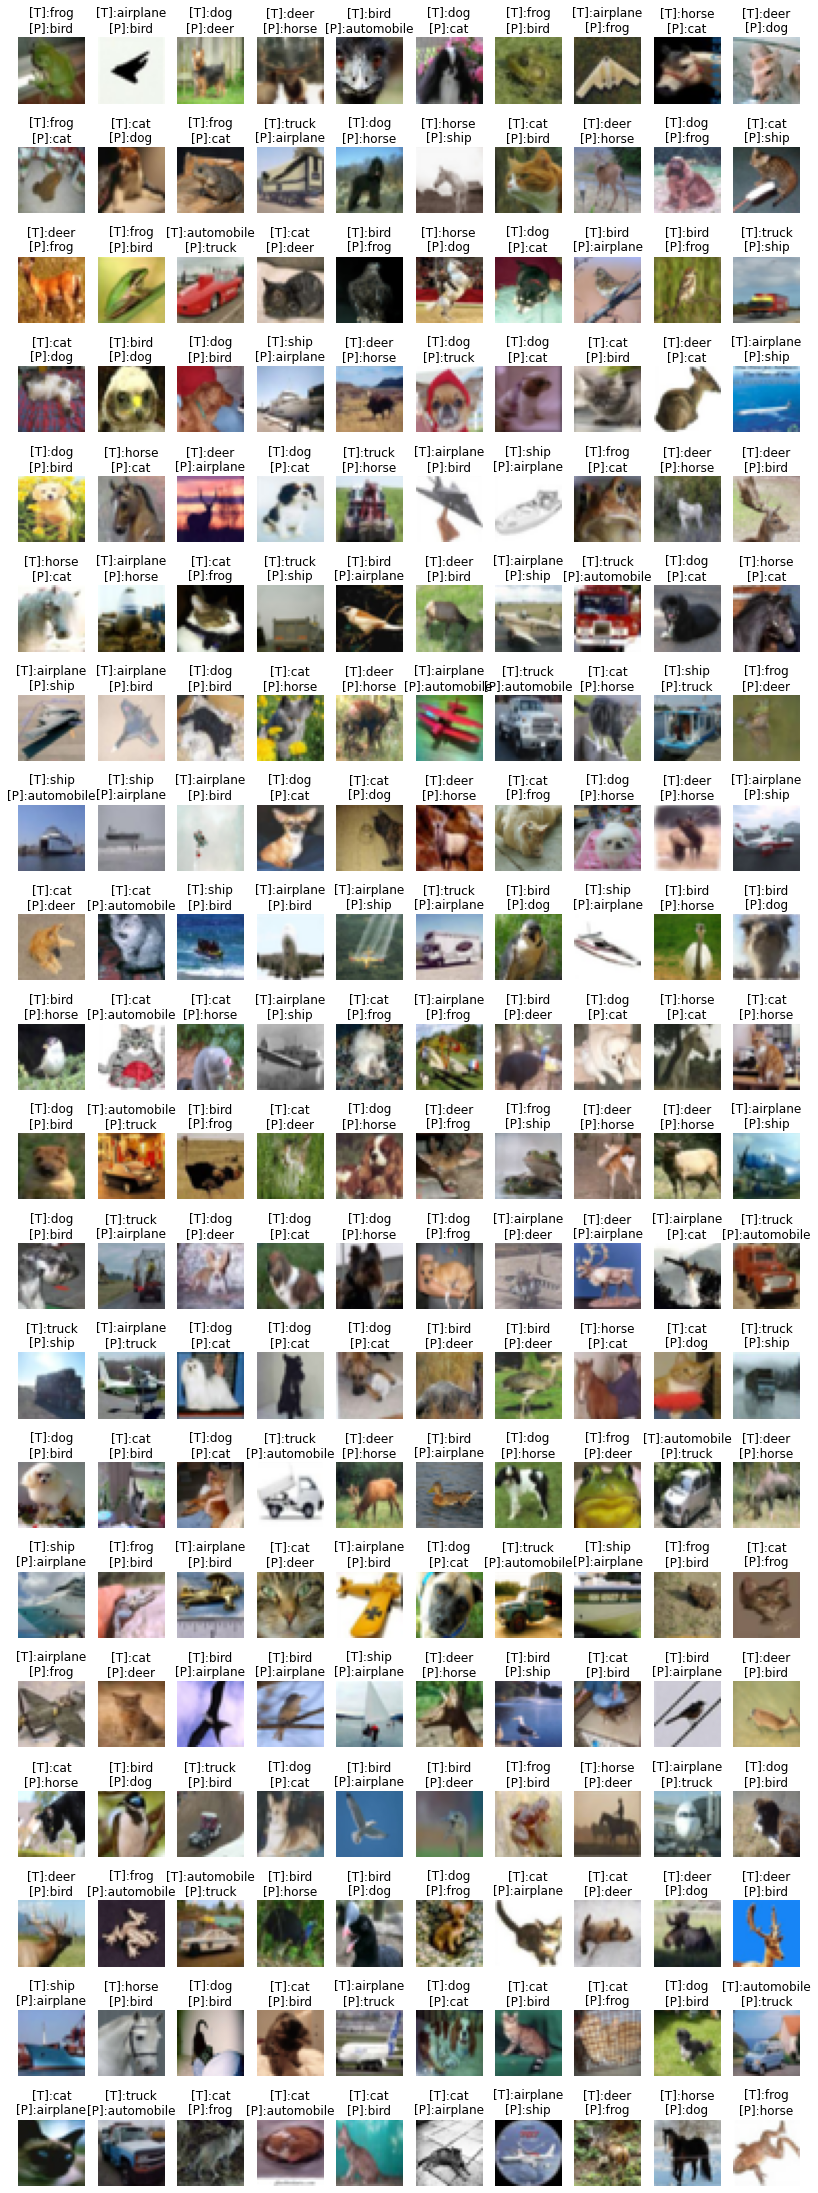

In [21]:
import matplotlib.pyplot as plt
import numpy as np
idx = np.nonzero(pre != y_test)[0]
# !!!
idx = idx[:200]
false_pre = pre[idx]
false_true = y_test[idx]
false_img = x_test[idx]
plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[T]:{}\n[P]:{}".format(trans[false_true[i]],
                   trans[false_pre[i]])
    plt.axis("off")
    plt.title(t)
    plt.imshow(false_img[i])